### StatsModels 패키지 소개
StatsModels는 통계 분석을 위한 Python 패키지

http://www.statsmodels.org

#### 1. 기초 통계 (Statistics)

- 각종 검정(test) 기능
- 커널 밀도 추정
- Generalized Method of Moments
- 회귀 분석 (Linear Regression)

#### 2. 선형 모형 (Linear Model)
- 일반화 선형 모형 (Generalized Linear Model)
- 강인 선형 모형 (Robust Linear Model)
- 선형 혼합 효과 모형 (Linear Mixed Effects Model)
- ANOVA (Analysis of Variance)
- Discrete Dependent Variable (Logistic Regression 포함)

#### 3. 시계열 분석 (Time Series Analysis)
- ARMA/ARIMA Process
- Vector ARMA Process


선형 회귀분석의 경우 R-style 모형 기술을 가능하게 하는 patsy 패키지를 포함
https://patsy.readthedocs.org/en/latest/

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
dat.tail()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
81,86,W,Vienne,15010,4710,25,8922,35224,21851,2:Med,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,2:Med,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,88,E,Vosges,18835,9044,62,4040,14978,33029,2:Med,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,89,C,Yonne,18006,6516,47,4276,16616,12789,2:Med,...,32,22,35,51,66,27,272,81.797,7427,352.49
85,200,NaN,Corse,2199,4589,49,37015,24743,37016,2:Med,...,81,2,84,83,9,25,1,539.213,8680,195.41


### 회귀분석

In [8]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Mon, 25 Sep 2017   Prob (F-statistic):           1.90e-08
Time:                        10:40:39   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

#### R에서 제공하던 명령어 + Rdatasets 이라는 프로젝트 -> R에서 사용하던 1000개 이상의 표준 데이터셋 동일하게 제공

> 데이터셋의 목록 : https://github.com/vincentarelbundock/Rdatasets

> http://vincentarelbundock.github.io/Rdatasets/datasets.html
이 목록에 있는 데이터를 가져오려면 우선 "Package"이름과 "Item"을 알아낸 후 다음에 설명하는 get_rdataset 명령을 이용한다.

### get_rdataset 함수
#### StatsModels의 datasets 서브패키지에 있는 get_rdataset 함수 : 표준 데이터셋을 가져올 수 있다.
> get_rdataset(item, [package="datasets"])

>> - data : 데이터를 담고 있는 데이터 프레임
>> - __doc__ : 데이터에 대한 설명 문자열. 예제 코드가 R로 되어있어 파이썬에서 바로 사용 불가능

### 샘플데이터의 예1: 타이타닉 생존자

In [9]:
data = sm.datasets.get_rdataset("Titanic", package="datasets")

In [10]:
df = data.data
df.tail()

,Name,PClass,Age,Sex,Survived,SexCode
1308,"Zakarian, Mr Artun",3rd,27.0,male,0,0
1309,"Zakarian, Mr Maprieder",3rd,26.0,male,0,0
1310,"Zenni, Mr Philip",3rd,22.0,male,0,0
1311,"Lievens, Mr Rene",3rd,24.0,male,0,0
1312,"Zimmerman, Leo",3rd,29.0,male,0,0


In [11]:
print(data.__doc__)

+-----------+-------------------+
| Titanic   | R Documentation   |
+-----------+-------------------+

Survival of passengers on the Titanic
-------------------------------------

Description
~~~~~~~~~~~

This data set provides information on the fate of passengers on the
fatal maiden voyage of the ocean liner ‘Titanic’, summarized according
to economic status (class), sex, age and survival.

Usage
~~~~~

::

    Titanic

Format
~~~~~~

A 4-dimensional array resulting from cross-tabulating 2201 observations
on 4 variables. The variables and their levels are as follows:

+------+------------+-----------------------+
| No   | Name       | Levels                |
+------+------------+-----------------------+
| 1    | Class      | 1st, 2nd, 3rd, Crew   |
+------+------------+-----------------------+
| 2    | Sex        | Male, Female          |
+------+------------+-----------------------+
| 3    | Age        | Child, Adult          |
+------+------------+-----------------------+
| 4    | 

### 샘플데이터의 예2: 미국 강수량

In [23]:
data = sm.datasets.get_rdataset("precip")
print(data.__doc__)

+----------+-------------------+
| precip   | R Documentation   |
+----------+-------------------+

Annual Precipitation in US Cities
---------------------------------

Description
~~~~~~~~~~~

The average amount of precipitation (rainfall) in inches for each of 70
United States (and Puerto Rico) cities.

Usage
~~~~~

::

    precip

Format
~~~~~~

A named vector of length 70.

Note
~~~~

The dataset version up to Nov.16, 2016 had a typo in ``"Cincinnati"``'s
name. The examples show how to recreate that version.

Source
~~~~~~

Statistical Abstracts of the United States, 1975.

References
~~~~~~~~~~

McNeil, D. R. (1977) *Interactive Data Analysis*. New York: Wiley.

Examples
~~~~~~~~

::

    require(graphics)
    dotchart(precip[order(precip)], main = "precip data")
    title(sub = "Average annual precipitation (in.)")

    ## Old ("wrong") version of dataset (just name change):
    precip.O <- local({
       p <- precip; names(p)[names(p) == "Cincinnati"] <- "Cincinati" ; p })
    s

In [24]:
df = data.data
df.tail()

,x
65,17.4
66,40.8
67,29.1
68,14.6
69,59.2


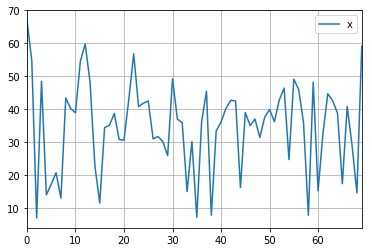

In [25]:
df.plot()
plt.grid(True)
plt.show()

### 샘플데이터의 예 3: 황체형성 호르몬 수치 시계열

In [26]:
data = sm.datasets.get_rdataset("lh")
print(data.__doc__)
df = data.data
df.tail()

+------+-------------------+
| lh   | R Documentation   |
+------+-------------------+

Luteinizing Hormone in Blood Samples
------------------------------------

Description
~~~~~~~~~~~

A regular time series giving the luteinizing hormone in blood samples at
10 mins intervals from a human female, 48 samples.

Usage
~~~~~

::

    lh

Source
~~~~~~

P.J. Diggle (1990) *Time Series: A Biostatistical Introduction.* Oxford,
table A.1, series 3



,time,lh
43,44,2.6
44,45,2.1
45,46,3.4
46,47,3.0
47,48,2.9


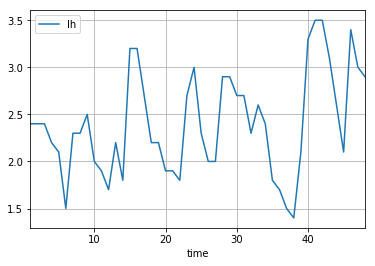

In [27]:
df.plot(x="time", y="lh")
plt.grid(True)
plt.show()

### 샘플데이터의 예 4: 호흡기질환 사망자수

In [29]:
data = sm.datasets.get_rdataset("deaths", "MASS")
print(data.__doc__)
df = data.data
df.tail()

+----------+-------------------+
| deaths   | R Documentation   |
+----------+-------------------+

Monthly Deaths from Lung Diseases in the UK
-------------------------------------------

Description
~~~~~~~~~~~

A time series giving the monthly deaths from bronchitis, emphysema and
asthma in the UK, 1974-1979, both sexes (``deaths``),

Usage
~~~~~

::

    deaths

Source
~~~~~~

P. J. Diggle (1990) *Time Series: A Biostatistical Introduction.*
Oxford, table A.3

References
~~~~~~~~~~

Venables, W. N. and Ripley, B. D. (2002) *Modern Applied Statistics with
S.* Fourth edition. Springer.

See Also
~~~~~~~~

This the same as dataset ``ldeaths`` in **R**'s datasets package.



,time,deaths
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


#### 이 시계열 데이터에서는 시간이 1년을 1.0으로, 1개월을 1/12로 하는 값(year-fraciton)으로 인코딩되어 있다. 이 값을 파이썬의 datatime 포맷으로 바꾸려면 다음과 같은 함수를 사용해야 한다.

In [30]:
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime, dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

In [31]:
df["datetime"] = df.time.map(yearfraction2datetime)
df.tail()

,time,deaths,datetime
67,1979.583333,1354,1979-08-01
68,1979.666667,1333,1979-09-01
69,1979.750000,1492,1979-10-01
70,1979.833333,1781,1979-11-01
71,1979.916667,1915,1979-12-01


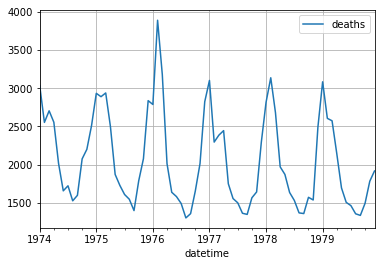

In [32]:
df.plot(x="datetime", y="deaths")
plt.grid(True)
plt.show()

### 샘플데이터의 예5: 항공 운송인원

In [33]:
data = sm.datasets.get_rdataset("AirPassengers")
print(data.__doc__)
df = data.data
df.tail()

+-----------------+-------------------+
| AirPassengers   | R Documentation   |
+-----------------+-------------------+

Monthly Airline Passenger Numbers 1949-1960
-------------------------------------------

Description
~~~~~~~~~~~

The classic Box & Jenkins airline data. Monthly totals of international
airline passengers, 1949 to 1960.

Usage
~~~~~

::

    AirPassengers

Format
~~~~~~

A monthly time series, in thousands.

Source
~~~~~~

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) *Time Series
Analysis, Forecasting and Control.* Third Edition. Holden-Day. Series G.

Examples
~~~~~~~~

::

    ## Not run: 
    ## These are quite slow and so not run by example(AirPassengers)

    ## The classic 'airline model', by full ML
    (fit <- arima(log10(AirPassengers), c(0, 1, 1),
                  seasonal = list(order = c(0, 1, 1), period = 12)))
    update(fit, method = "CSS")
    update(fit, x = window(log10(AirPassengers), start = 1954))
    pred <- predict(fit, n.ahead = 24

,time,AirPassengers
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [34]:
df["datetime"] = df.time.map(yearfraction2datetime)
df.tail()

,time,AirPassengers,datetime
139,1960.583333,606,1960-08-01
140,1960.666667,508,1960-09-01
141,1960.750000,461,1960-10-01
142,1960.833333,390,1960-11-01
143,1960.916667,432,1960-12-01


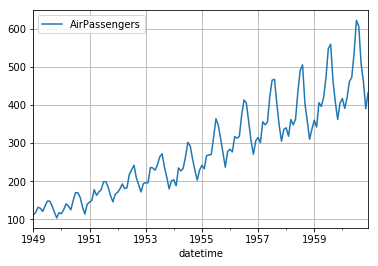

In [35]:
df.plot(x = "datetime", y="AirPassengers")
plt.grid(True)
plt.show()